## **LIBRARIES**

In [7]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [13]:
from utils import load_model, select_skills, count_similar_elements, encode_programming_level, encode_education

## **UTILS**

In [14]:
import matplotlib.pyplot as plt

def pie_chart(data, feature_name, title="Dataset Feature Pie Chart", autopct="%1.1f%%"):
  """Plots a pie chart of a dataset feature containing 2 unique values.

  Args:
    data: A Pandas DataFrame containing the dataset.
    feature_name: The name of the dataset feature to plot.
    title: The title of the plot.
    autopct: The format string for the pie chart labels.
  """

  # Get the unique values of the feature.
  unique_values = data[feature_name].unique()

  # Count the number of occurrences of each unique value.
  counts = data[feature_name].value_counts()

  # Create a pie chart of the counts.
  plt.pie(counts, labels=unique_values, autopct=autopct)

  # Set the title of the plot.
  plt.title(title)

  # Show the plot.
  plt.show()

## **DATASET**

In [15]:
data = pd.read_csv("InternshipDataset.csv")

In [16]:
data.head()

,id,gender,age,company_name,intern_role,internship_duration,academic_gpa,number_of_internships_completed,number_of_certification,intern_technical_skills,programming_level,technical_skills_required,technical_interview_score,education,department,internship_success
0,26b69c03-6340-473f-b784-5d8de5e4faa4,female,22,CLIMDES,Machine Learning,12,2.46,1,1,"['PowerPoint', 'Excel', 'Pandas']",Beginner,"['Python', 'SQL', 'Machine Learning']",165,student,Computer Science,False
1,67f8d1d5-877d-4d45-ac65-9ddfcf6539f8,female,25,CLIMDES,Backend,6,2.51,0,2,"['C', 'Java', 'C++']",Intermediate,"['Python', 'Java', 'SQL']",175,graduate,Engineering,False
2,8afb2e1c-777f-4500-91f6-e4099b57dc82,male,22,CLIMDES,Backend,6,2.11,1,2,"['C', 'SQL', 'Java']",Intermediate,"['Python', 'Java', 'SQL']",193,student,Engineering,False
3,22380422-6b67-4f80-86ac-497430d75fb3,female,24,CLIMDES,Frontend,12,3.50,4,5,"['JavaScript', 'CSS', 'HTML']",Intermediate,"['HTML', 'CSS', 'JavaScript']",242,student,Engineering,True
4,713bbbe2-be44-4566-aec2-d5a228e72c23,female,22,CLIMDES,Backend,12,2.87,0,0,"['CSS', 'SQL', 'C++']",Beginner,"['Python', 'Java', 'SQL']",188,student,Engineering,False


## **Exploratory Data Analysis**

**What features are available in the dataset?**

Noting the feature names for directly manipulating or analyzing these.

In [17]:
data.columns

Index(['id', 'gender', 'age', 'company_name', 'intern_role',
       'internship_duration', 'academic_gpa',
       'number_of_internships_completed', 'number_of_certification',
       'intern_technical_skills', 'programming_level',
       'technical_skills_required', 'technical_interview_score', 'education',
       'department', 'internship_success'],
      dtype='object')

**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: **gender, company_name, intern_role, intern_technical_skills, programming_level,technical_skills_required, education, department, internship_success**.


Which features are numerical?

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Continous: **age, internship_duration, academic_gpa,
       number_of_internships_completed, number_of_certification,
        technical_interview_score**.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               2500 non-null   object 
 1   gender                           2500 non-null   object 
 2   age                              2500 non-null   int64  
 3   company_name                     2500 non-null   object 
 4   intern_role                      2500 non-null   object 
 5   internship_duration              2500 non-null   int64  
 6   academic_gpa                     2500 non-null   float64
 7   number_of_internships_completed  2500 non-null   int64  
 8   number_of_certification          2500 non-null   int64  
 9   intern_technical_skills          2500 non-null   object 
 10  programming_level                2500 non-null   object 
 11  technical_skills_required        2500 non-null   object 
 12  technical_interview_

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 2500 or 100% of the actual number of interns in the dataset.

In [19]:
data.describe()

,age,internship_duration,academic_gpa,number_of_internships_completed,number_of_certification,technical_interview_score
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,23.060800,7.080000,2.993096,1.784000,3.181600,198.086000
std,1.399245,3.787894,0.655566,1.482371,3.108261,32.400928
min,21.000000,3.000000,2.000000,0.000000,0.000000,150.000000
25%,22.000000,3.000000,2.420000,1.000000,1.000000,169.000000
50%,23.000000,6.000000,2.840000,2.000000,2.000000,189.000000
75%,24.000000,12.000000,3.670000,2.000000,6.000000,231.000000
max,25.000000,12.000000,4.000000,5.000000,10.000000,250.000000


In [20]:
data.describe(include=['O'])

,id,gender,company_name,intern_role,intern_technical_skills,programming_level,technical_skills_required,education,department
count,2500,2500,2500,2500,2500,2500,2500,2500,2500
unique,2500,2,1,3,393,2,3,2,4
top,26b69c03-6340-473f-b784-5d8de5e4faa4,female,CLIMDES,Machine Learning,"['SQL', 'Python', 'HTML']",Intermediate,"['Python', 'SQL', 'Machine Learning']",graduate,Computer Science
freq,1,1253,2500,838,25,1750,838,1251,653


**Observation**

- id are unique across the dataset (count=unique=2500)
- gender variable as 2 possible values with 50.1% female (top=male, freq=1253 count=2500).
- company_name feature has only one unique element "CLIMDES"
- intern_role feature has 2 possible values
- intern_technical_skills feature has 393 possible values
- programming_level feature has 2 possible values
- education feature has 2 possible values
- department feature has 4 possible values
- technical_skills_required feature has 3 possible values

In [21]:
data[['gender', 'internship_success']].groupby(['gender'], as_index=False).mean().sort_values(by='internship_success', ascending=False)

,gender,internship_success
1,male,0.403368
0,female,0.395052


In [22]:
data[['intern_role', 'internship_success']].groupby(['intern_role'], as_index=False).mean().sort_values(by='internship_success', ascending=False)

,intern_role,internship_success
0,Backend,0.410133
1,Frontend,0.402161
2,Machine Learning,0.385442


In [23]:
data[['programming_level', 'internship_success']].groupby(['programming_level'], as_index=False).mean().sort_values(by='internship_success', ascending=False)

,programming_level,internship_success
1,Intermediate,0.570286
0,Beginner,0.000000


In [24]:
data[['education', 'internship_success']].groupby(['education'], as_index=False).mean().sort_values(by='internship_success', ascending=False)

,education,internship_success
1,student,0.413931
0,graduate,0.384492


In [25]:
data[['department', 'internship_success']].groupby(['department'], as_index=False).mean().sort_values(by='internship_success', ascending=False)

,department,internship_success
0,Computer Science,0.408882
1,Engineering,0.407407
2,Mathematics,0.391447
3,Statistics,0.388350


In [26]:
data[['internship_duration', 'internship_success']].groupby(['internship_duration'], as_index=False).mean().sort_values(by='internship_success', ascending=False)

,internship_duration,internship_success
1,6,0.418342
2,12,0.394009
0,3,0.386364


**Observation**

* **gender**: The success rate of males and `females` are approximately the same with `male` having 40.3% and female having 39.5%

* **programming_level**: The success rate of `intermediate` level interns is 57% with `beginner` level recording 0 success rate

* **education**: The success rate is higher for `students` (41.4%) compared with `graduates' (38.4%)

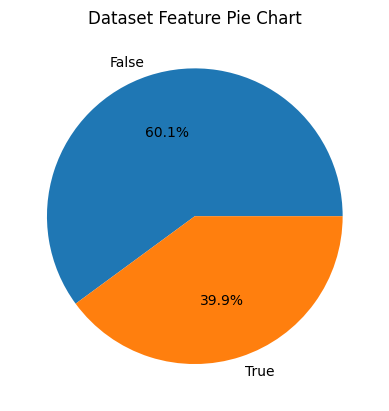

In [27]:
pie_chart(data, feature_name = "internship_success")

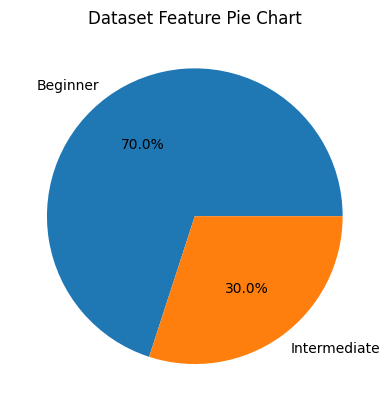

In [28]:
pie_chart(data, feature_name = "programming_level")

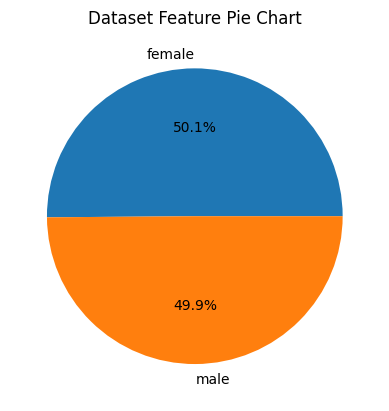

In [29]:
pie_chart(data, feature_name = "gender")

**Observation**

* The charts futher explain the analytics above

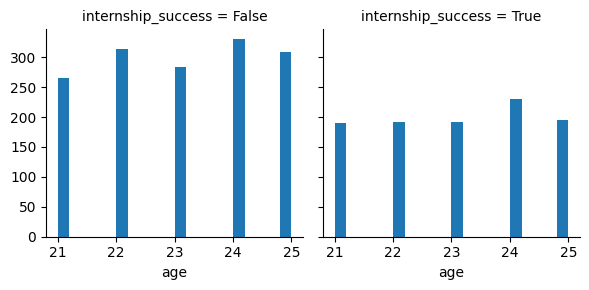

In [30]:
g = sns.FacetGrid(data, col='internship_success')
g.map(plt.hist, 'age', bins=20)

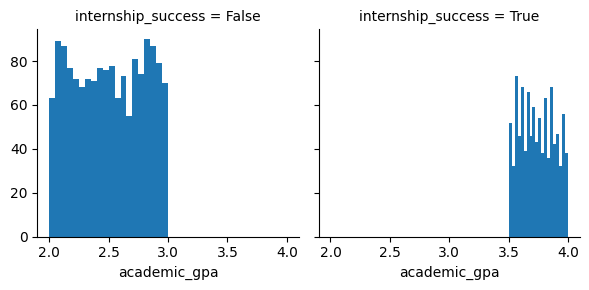

In [31]:
g = sns.FacetGrid(data, col='internship_success')
g.map(plt.hist, 'academic_gpa', bins=20)

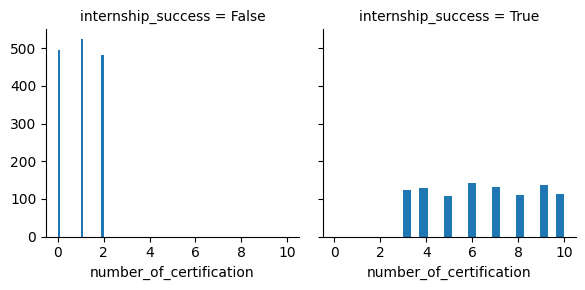

In [32]:
g = sns.FacetGrid(data, col='internship_success')
g.map(plt.hist, 'number_of_certification', bins=20)

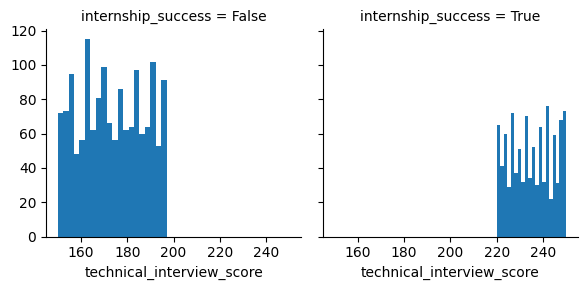

In [33]:
g = sns.FacetGrid(data, col='internship_success')
g.map(plt.hist, 'technical_interview_score', bins=20)

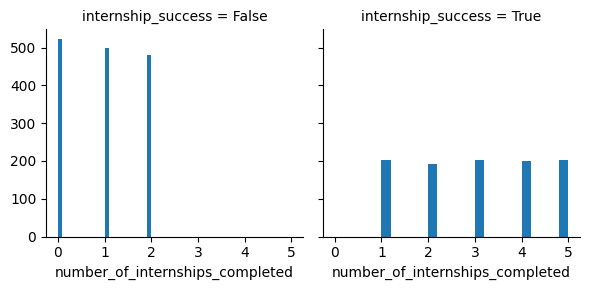

In [34]:
g = sns.FacetGrid(data, col='internship_success')
g.map(plt.hist, 'number_of_internships_completed', bins=20)

## **Feature Engineering**

**Counting the number of needed skills the intern possess**

In [35]:
# Count the number of needed skills the intern possess
data["skills_match"] = data.apply(lambda row: count_similar_elements(ast.literal_eval(row['intern_technical_skills']),
                                                                     ast.literal_eval(row['technical_skills_required'])), axis=1)

In [36]:
data[['skills_match', 'internship_success']].groupby(['skills_match'], as_index=False).mean().sort_values(by='internship_success', ascending=False)

,skills_match,internship_success
3,3,1.000000
2,2,0.616736
1,1,0.251240
0,0,0.000000


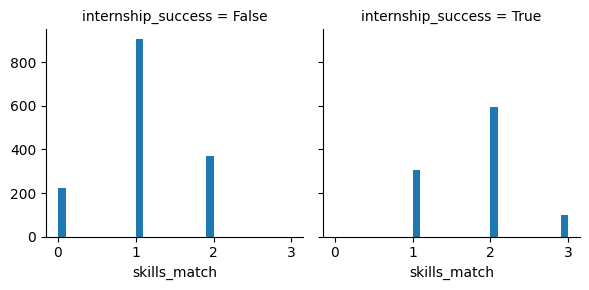

In [37]:
g = sns.FacetGrid(data, col='internship_success')
g.map(plt.hist, 'skills_match', bins=20)

**Observation**

* **100%** of interns with all required skills were admitted for the internship.
* There is a recorded **61.67%** success rate for interns with two of the three required technical skills.
* There is a recorded **25.12%** success rate for interns with one of the three required technical skills.
* There is a recorded **0%** success rate for interns with none of the three required technical skills.

In [122]:
data.head()

,id,gender,age,company_name,intern_role,internship_duration,academic_gpa,number_of_internships_completed,number_of_certification,intern_technical_skills,programming_level,technical_skills_required,technical_interview_score,education,department,internship_success,skills_match
0,26b69c03-6340-473f-b784-5d8de5e4faa4,female,22,CLIMDES,Machine Learning,12,2.46,1,1,"['PowerPoint', 'Excel', 'Pandas']",Beginner,"['Python', 'SQL', 'Machine Learning']",165,student,Computer Science,False,0
1,67f8d1d5-877d-4d45-ac65-9ddfcf6539f8,female,25,CLIMDES,Backend,6,2.51,0,2,"['C', 'Java', 'C++']",Intermediate,"['Python', 'Java', 'SQL']",175,graduate,Engineering,False,1
2,8afb2e1c-777f-4500-91f6-e4099b57dc82,male,22,CLIMDES,Backend,6,2.11,1,2,"['C', 'SQL', 'Java']",Intermediate,"['Python', 'Java', 'SQL']",193,student,Engineering,False,2
3,22380422-6b67-4f80-86ac-497430d75fb3,female,24,CLIMDES,Frontend,12,3.50,4,5,"['JavaScript', 'CSS', 'HTML']",Intermediate,"['HTML', 'CSS', 'JavaScript']",242,student,Engineering,True,3
4,713bbbe2-be44-4566-aec2-d5a228e72c23,female,22,CLIMDES,Backend,12,2.87,0,0,"['CSS', 'SQL', 'C++']",Beginner,"['Python', 'Java', 'SQL']",188,student,Engineering,False,1


## **Split DataFrame**

In [123]:
## Converting target variable from boolean to binary
data["internship_success"] = data["internship_success"]*1

In [124]:
## Splitting the dataset into train and test data
train, test = train_test_split(data, stratify = data["internship_success"], random_state = 46, test_size = 0.2)

In [125]:
## Reset data index
train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

In [126]:
train.shape, test.shape

((2000, 17), (500, 17))

In [86]:
train.head(2)

,id,gender,age,company_name,intern_role,internship_duration,academic_gpa,number_of_internships_completed,number_of_certification,intern_technical_skills,programming_level,technical_skills_required,technical_interview_score,education,department,internship_success,skills_match
0,5170bf98-3368-4ced-9e0c-ef802d462a79,male,25,CLIMDES,Machine Learning,12,2.08,0,1,"['SQL', 'Python', 'HTML']",Intermediate,"['Python', 'SQL', 'Machine Learning']",177,student,Mathematics,0,2
1,7ed85dbd-6544-410e-a06e-402f14764cfd,male,24,CLIMDES,Machine Learning,3,2.22,0,0,"['SQL', 'Excel', 'Python']",Beginner,"['Python', 'SQL', 'Machine Learning']",169,student,Statistics,0,2


**Categorical data encoding**

In [143]:
OHE_features = ["gender", "intern_role", "department"]

drop_features = ["intern_technical_skills", "technical_skills_required", "company_name"]

In [145]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data_train = encoder.fit_transform(train[OHE_features])
encoded_data_test = encoder.transform(test[OHE_features])

# Retrieve feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(OHE_features)

# Create a DataFrame with the one-hot encoded columns and proper feature names
data_encoded_train = pd.DataFrame(encoded_data_train, columns=feature_names)
data_encoded_test = pd.DataFrame(encoded_data_test, columns=feature_names)

In [146]:
train = pd.concat([train, data_encoded_train], axis = 1)
test = pd.concat([test, data_encoded_test], axis = 1)

In [154]:
train["education"] = train["education"].apply(encode_education)
test["education"] = test["education"].apply(encode_education)

train["programming_level"] = train["programming_level"].apply(encode_education)
test["programming_level"] = test["programming_level"].apply(encode_education)

**Features**

In [155]:
features = ['age',
       'internship_duration', 'academic_gpa',
       'number_of_internships_completed', 'number_of_certification',
        'programming_level', 'technical_interview_score', 'education', 'skills_match',
       'gender_male',  'intern_role_Frontend',
       'intern_role_Machine Learning', 'department_Computer Science',
       'department_Engineering', 'department_Mathematics']

target = 'internship_success'

In [157]:
X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]

In [166]:
X_train.shape, X_test.shape

((2000, 18), (500, 18))

In [237]:
X_train.columns

Index(['age', 'internship_duration', 'academic_gpa',
       'number_of_internships_completed', 'number_of_certification',
       'programming_level', 'technical_interview_score', 'education',
       'skills_match', 'gender_male', 'gender_male', 'intern_role_Frontend',
       'intern_role_Frontend', 'intern_role_Machine Learning',
       'intern_role_Machine Learning', 'department_Computer Science',
       'department_Engineering', 'department_Mathematics'],
      dtype='object')

## **Modelling**

**Logistic Regression**

In [169]:
# Initialize logistic regression model
log_reg = LogisticRegression()

# Define hyperparameters to search through
parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3,3,7)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, parameters, cv=5, scoring='accuracy')

# Perform the grid search on the dataset
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Best Score: 1.0


In [168]:
# Logistic Regression
model_log_reg = LogisticRegression(**{'C': 0.001, 'penalty': 'l2'})
model_log_reg.fit(X_train, y_train)

y_train_hat = model_log_reg.predict(X_train)
y_test_hat = model_log_reg.predict(X_test)

print(model_log_reg)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

LogisticRegression(C=0.001)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1202
           1       1.00      1.00      1.00       798

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       200

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Accuracy score
-------------------------------------------------------
1.0

Confusion matrix
-------------------------------------------------------
[[300   0]
 [  0 200]]

**XGBOOST**

In [172]:
#Randomforest hyper-parameter tuning
rfc = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [173]:
# Random Forest
model_RF = RandomForestClassifier(random_state=42, **{'criterion': 'gini',
                                                      'max_depth': 4,
                                                      'max_features': 'auto',
                                                      'n_estimators': 200})
model_RF.fit(X_train, y_train)
y_train_hat = model_RF.predict(X_train)
y_test_hat = model_RF.predict(X_test)

print(model_RF)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=200,
                       random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1202
           1       1.00      1.00      1.00       798

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       200

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Accuracy score
-------------------------------------------------------
1.0

Confusio

## **Model Explanability**

In [177]:
%%capture
!pip install shap

In [178]:
import shap

In [179]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(model_RF)

In [181]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
test.loc[[421]][features]

,age,internship_duration,academic_gpa,number_of_internships_completed,number_of_certification,programming_level,technical_interview_score,education,skills_match,gender_male,gender_male,intern_role_Frontend,intern_role_Frontend,intern_role_Machine Learning,intern_role_Machine Learning,department_Computer Science,department_Engineering,department_Mathematics
421,24,6,2.42,1,1,2,187,1,1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [198]:
# Calculate Shap values
choosen_instance = X_test.loc[[421]][features]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

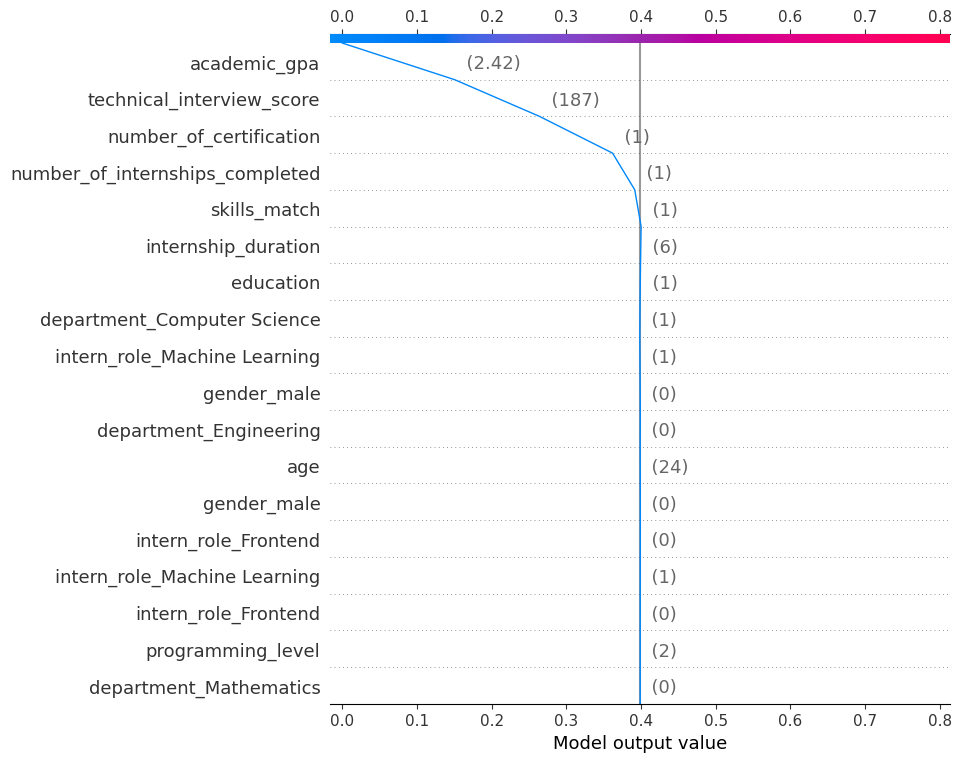

In [199]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

**Interpretation**:

The figure above is a force plot visualizing shapley values for the features. Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect. Feature values in blue cause to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

Model predicted 0 (Internship application not successful). Biggest effect is the intern academic gpa; This has decreased his chances of getting the internship. Next, intern technical score 187 also decreases his chances of getting the internship.

In [185]:
#Let's choose some instances from the test dataset to understand to the classifier makes predictions for them.
test.loc[[7]][features]

,age,internship_duration,academic_gpa,number_of_internships_completed,number_of_certification,programming_level,technical_interview_score,education,skills_match,gender_male,gender_male,intern_role_Frontend,intern_role_Frontend,intern_role_Machine Learning,intern_role_Machine Learning,department_Computer Science,department_Engineering,department_Mathematics
7,25,6,3.97,4,3,2,230,1,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [194]:
# Calculate Shap values
choosen_instance = X_test.loc[[7]][features]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

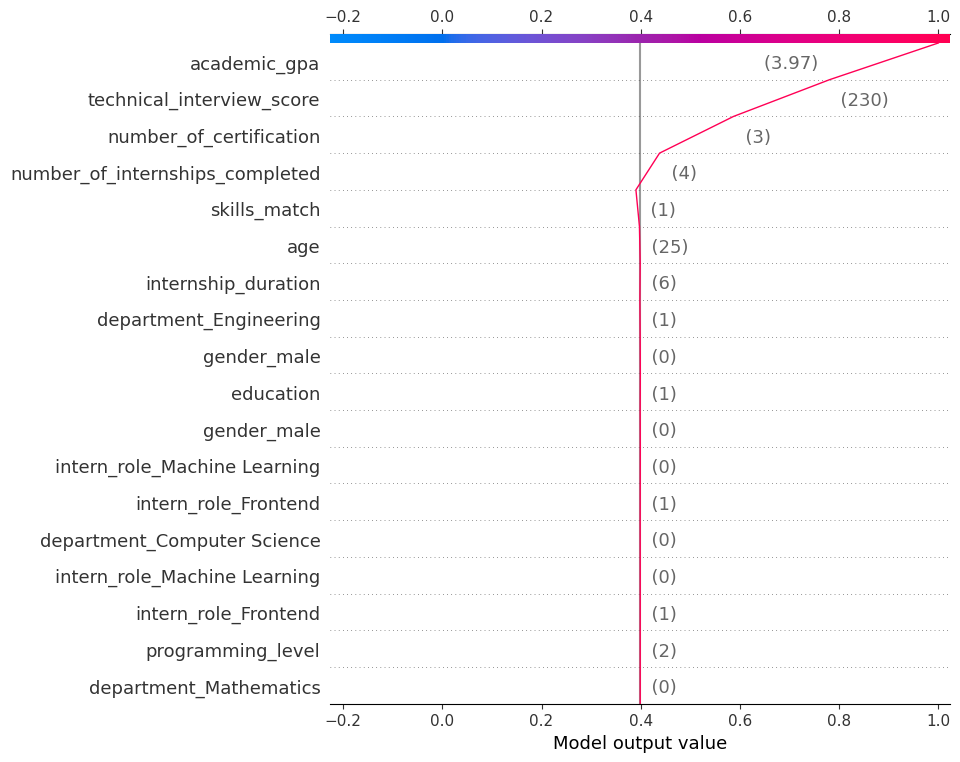

In [196]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

**Interpretation**:

Model predicted 1 (Internship application was successful). Biggest effect is the intern academic gpa (3.97) and technical interview score (230); This has Increased his chances of getting the internship. Next, the number of prevoius internships completed (4) and number of certification (3) increased the chances of grtting the internship.

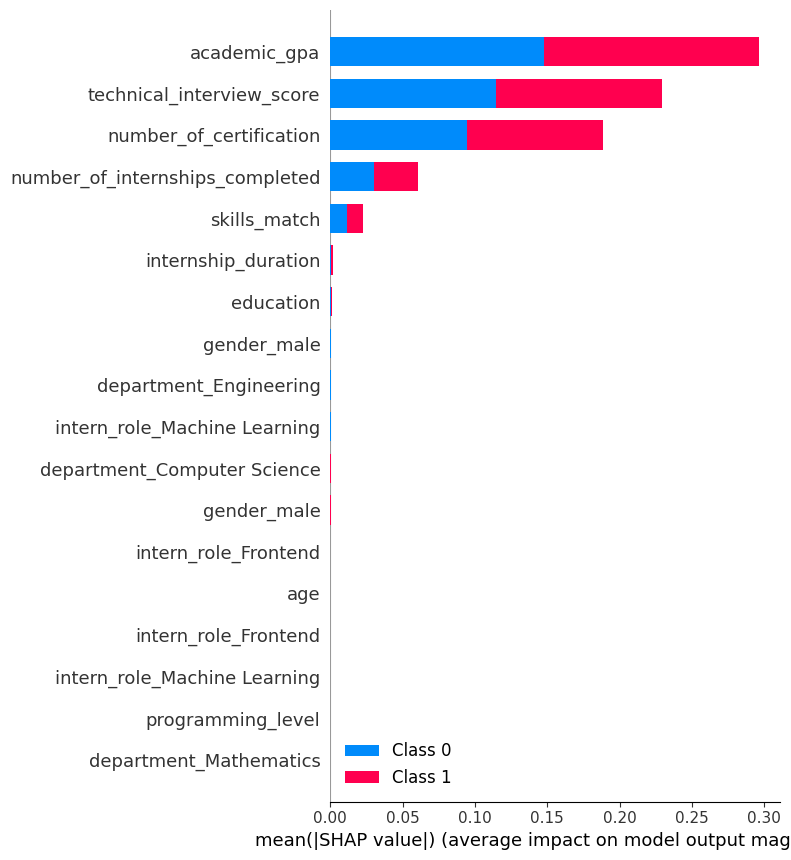

In [189]:
shap.summary_plot(shap_values, X_train)

## **Model Saving and deployment**

In [201]:
import pickle

In [221]:
save_file = {
    "model": model_RF,
    "features": features,
    "OHE_encoder": encoder,
    "OHE_encoder_feat": feature_names
}

drive_path = "/content/drive/MyDrive/CLIMDES_ML_TEST/"

In [223]:
with open(f"{drive_path}internship_success_model.pkl", 'wb') as file:
  pickle.dump(save_file, file)